In [23]:
from algos.a_start import a_star
from algos.bellman_ford import bellman_ford
from algos.bfs import bfs
from algos.dfs import dfs
from algos.dijkstras import dijkstra
from util.util import maze_csv_to_matrix
from entities.graph import Graph
import matplotlib
import matplotlib.pyplot as plt
from memory_profiler import profile
from IPython.display import clear_output
import time
import csv
%load_ext memory_profiler


def plot_graph(graph: Graph):
    colors = 'lime black blue magenta yellow'.split()
    cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)
    plotable_matrix =[]
    for node_row in graph.node_matrix:
        plotable_row = []
        for node in node_row:
            plotable_row.append(node.representation if node else 1)
        plotable_matrix.append(plotable_row)
    fig, ax = plt.subplots()
    plt.axis('off')
    ax.matshow(plotable_matrix, cmap=cmap)
    # for n in range(graph.n):
    #     for m in range(graph.m):
    #         node = graph.node_matrix[n][m]
    #         ax.text(m, n, str(node.representation if node else 1), va='center', ha='center')
    plt.show(block=False)
    plt.close()

def write_graph(file_name: str, graph: Graph):
    with open(f"{file_name}.csv", 'w+', newline='') as file:
        writer = csv.writer(file)
        for node_row in graph.node_matrix:
            writer.writerow([node.representation if node else 1 for node in node_row])

def do_on_finish(result, graph):
    if result:
        path = "./maze_solved"
        print("Resultado del algoritmo:")
        graph.set_path(result)
        plot_graph(graph)
        write_graph(path, graph)
        print(f"Se ha creado un csv con la solución en la ruta {path}.csv")
    else:
        print("El algoritmo no logró determinar una solución")
    result = None

def timing(f):
    def wrap(*args, **kwargs):
        time1 = time.time()
        ret = f(*args, **kwargs)
        time2 = time.time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

@timing
def algo_performer(algo, *args):
    return algo(*args)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


- Maze solver -



Ingrese ruta de archivo con el laberinto ./test/test5.csv


Convirtiendo archivo...
Laberinto a resolver:


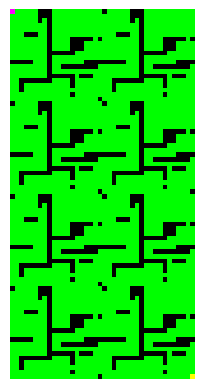


    Elijar el algoritmo a utilizar:
    1 - Dijkstra
    2 - Bellman-Ford
    3 - DFS (Depth First Search)
    4 - BFS (Breadth-first search)
    5 - A*
     5


algo_performer function took 615.470 ms
peak memory: 150.79 MiB, increment: 0.26 MiB
Resultado del algoritmo:


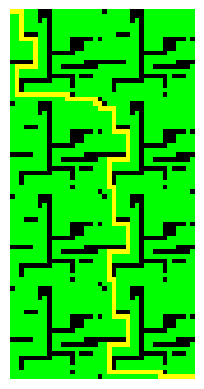

Se ha creado un csv con la solución en la ruta ./maze_solved.csv



    ¿Desea correr el programa nuevamente?
    0 - No
    1 - Si
     0


In [24]:
go_on = True
while go_on:
    print("- Maze solver -\n")
    ruta = input("Ingrese ruta de archivo con el laberinto")
    print("Convirtiendo archivo...")
    matrix = maze_csv_to_matrix(ruta)
    graph = Graph(matrix)
    start, end = graph.nodes.index(graph.start), graph.nodes.index(graph.end)
    print("Laberinto a resolver:")
    plot_graph(graph)
    algos = {1: dijkstra, 2: bellman_ford, 3: dfs, 4: bfs, 5: a_star}
    algo_preference = int(input("""
    Elijar el algoritmo a utilizar:
    1 - Dijkstra
    2 - Bellman-Ford
    3 - DFS (Depth First Search)
    4 - BFS (Breadth-first search)
    5 - A*
    """))
    if algo_preference == 5:
        %memit result = algo_performer(algos[algo_preference], graph, start, end, graph.heuristic)
        do_on_finish(result, graph)
    else:
        %memit result = algo_performer(algos[algo_preference],graph, start, end)
        do_on_finish(result, graph)
    go_on = int(input("""
    ¿Desea correr el programa nuevamente?
    0 - No
    1 - Si
    """))
    if go_on:
        clear_output()